# **TIMISE toolbox example usage for multiple methods**


This example downloads some toy data part of MitoEM validation set and evaluate them using the toolbox. The difference between these notebook and the one called "TIMISE_one_method_evaluation_example.ipynb" is that here multiple methods are evaluated at once. This allows to plot each method error in just one plot to compare them easily. This workflow was the one used ot evaluation MitoEM challenge submission. 

Take a look to **1)** "TIMISE_example_files" folder (when downloading it in step two) to see how different method predictions and the ground truth are stored on each correspoding directory and **2)** the paths used when calling **evaluate()** function.  

## **1. Download data and prepare enviroment**
---



In [1]:
#@markdown ##Play to download TIMISE code
import os
%cd '/content/'
if not os.path.exists('/content/TIMISE'):
    !git clone https://github.com/danifranco/TIMISE.git &> /dev/null
print("TIMISE code downloaded!")

/content
TIMISE code downloaded!


Install the dependencies. **You will need to restart the runtime**

In [3]:
!pip install -r '/content/TIMISE/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 2.7 MB/s 
     |████████████████████████████████| 132 kB 5.1 MB/s 
     |████████████████████████████████| 9.0 MB 44.2 MB/s 
     |████████████████████████████████| 357 kB 34.4 MB/s 
     |████████████████████████████████| 160 kB 28.1 MB/s 
     |████████████████████████████████| 193 kB 30.2 MB/s 
     |████████████████████████████████| 96 kB 5.7 MB/s 
     |████████████████████████████████| 49 kB 3.2 MB/s 
     |████████████████████████████████| 224 kB 50.7 MB/s 
     |████████████████████████████████| 979 kB 53.9 MB/s 
     |████████████████████████████████| 2.2 MB 39.1 MB/s 
     |████████████████████████████████| 2.9 MB 65.8 MB/s 
     |████████████████████████████████| 295 kB 51.4 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 4.1 MB 58.4 MB/s 
     |████████████████████████████████| 

## **2. Download example data**
---

In [1]:
#@markdown ##Play to download example data
import os

example_files="TIMISE_example_files.zip"
if not os.path.exists(example_files):
    %cd '/content'
    !gdown --id 1FvOGkhAUJOxa-8HcClK0ygDWD1-nrS5Y  &> /dev/null
    !unzip '/content/'{example_files}
    print("Example data downloaded")


Inspect the toy data:

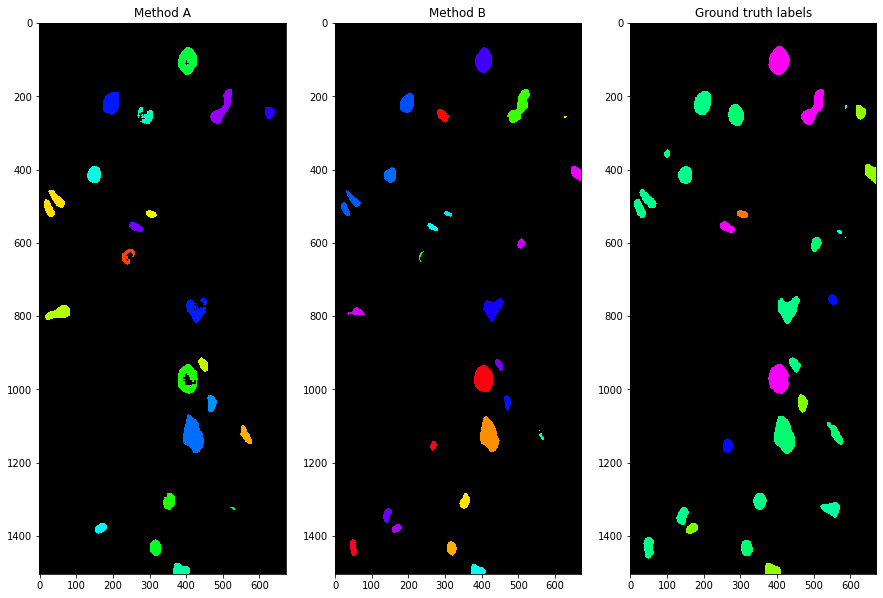

In [2]:
#@markdown ##Play to inspect the toy data

import os
import sys
import h5py
import numpy as np
from skimage.io import imread

# Show a few examples to heck that they have been stored correctly 
%matplotlib inline
from numpy.random import randint, seed
from matplotlib import pyplot as plt

def load_img(path):
    h5f = h5py.File(path, 'r')
    k = list(h5f.keys())
    return np.array(h5f[k[0]])

toy_sample = load_img("/content/TIMISE_example_files/methodA/methodA.h5") 
toy_sample2 = load_img("/content/TIMISE_example_files/methodB/methodB.h5") 
toy_mask = load_img("/content/TIMISE_example_files/GT/gt.h5") 

# Select random slice
slice = randint(0, toy_sample.shape[0], 1)

# create random color map
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gist_rainbow(vals))
cmap.colors[0] = [0., 0., 0., 1.] # set background to black

plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)    
plt.title("Method A")
plt.imshow(toy_sample[slice].squeeze(), cmap=cmap, interpolation='nearest')
plt.subplot(1, 3, 2)    
plt.title("Method B")
plt.imshow(toy_sample2[slice.squeeze()], cmap=cmap, interpolation='nearest')
plt.subplot(1, 3, 3)    
plt.title("Ground truth labels")
plt.imshow(toy_mask[slice].squeeze(), cmap=cmap, interpolation='nearest')
plt.show()

## **2. Running TIMISE**


Create TIMISE instance:

In [3]:
%cd /content/TIMISE
from timise import TIMISE

# Create three instance categories, small/medium/large, based on the cable length property. 
# The thresholds used to create those categories are 500 and 1000, which means:
#   - instances with cable length < 500 will be labelled as 'small'
#   - instances with 500 <= cable length < 1000 will be labelled as 'medium'
#   - instances with 1000 < cable length will be labelled as 'large' 
timise = TIMISE(split_categories=['small', 'medium', 'large'], split_property='cable_length', split_ths=[500, 1000]);

/content/TIMISE


Call **evaluate()** to start prediction evaluation

In [4]:
timise.evaluate("/content/TIMISE_example_files", "/content/TIMISE_example_files/GT", "/content/out_dir")

####### Preliminary checks #######
	Found 2 predictions: ['/content/TIMISE_example_files/methodA', '/content/TIMISE_example_files/methodB']
####### GT statistics #######
	Calculating GT statistics . . .
	Reading file /content/TIMISE_example_files/GT/gt.h5 . . .
	Calculating volumes . . .
	Skeletonizing . . .


Skeletonizing Labels:  96%|█████████▋| 105/109 [00:01<00:00, 64.64it/s]


	Calculating cable length . . .
	Adding categories information . . .
	Saving statistics in /content/out_dir/gt_stats.csv
	Creating grouping aux file . . .
	Saving grouping in /content/out_dir/gt_group_file.txt


--- Start evaluation ---
Processing folder /content/TIMISE_example_files/methodA
####### Predictions statistics #######
	Calculating predictions statistics . . .
	Reading file /content/TIMISE_example_files/methodA/methodA.h5 . . .
	Calculating volumes . . .
	Skeletonizing . . .


Skeletonizing Labels: 100%|██████████| 218/218 [00:05<00:00, 36.70it/s]


	Calculating cable length . . .
	Adding categories information . . .
	Saving statistics in /content/out_dir/methodA/prediction_stats.csv
####### Computing matching between predictions and ground truth #######
	1. Load data
		Assigning prediction score
		chunk 0
		chunk 1
		chunk 2
		chunk 3
		chunk 4
	2. Compute IoU
		Loading predict-score from file
		Calculating gt-score
		Loading bounding boxes from file
		Compute iou matching
	Matching dataframe stored in /content/out_dir/methodA/pred_gt_matching_info.csv . . .
	Association dataframe stored in /content/out_dir/methodA/associations.csv . . .
	RUNTIME:	6.797 [sec]

####### Computing association metrics #######
	Calculating associations . . .
	Saving associations metrics results in /content/out_dir/methodA/gt_final.csv
	Saving associations summary in /content/out_dir/methodA/associations_stats.csv
####### Grouping file #######
	Grouping file saved in /content/out_dir/methodA/pred_group_file.txt . . .
####### Computing mAP #######
	Run 

Skeletonizing Labels:  94%|█████████▎| 146/156 [00:01<00:00, 96.73it/s]


	Calculating cable length . . .
	Adding categories information . . .
	Saving statistics in /content/out_dir/methodB/prediction_stats.csv
####### Computing matching between predictions and ground truth #######
	1. Load data
		Assigning prediction score
		chunk 0
		chunk 1
		chunk 2
		chunk 3
		chunk 4
	2. Compute IoU
		Loading predict-score from file
		Calculating gt-score
		Loading bounding boxes from file
		Compute iou matching
	Matching dataframe stored in /content/out_dir/methodB/pred_gt_matching_info.csv . . .
	Association dataframe stored in /content/out_dir/methodB/associations.csv . . .
	RUNTIME:	8.227 [sec]

####### Computing association metrics #######
	Calculating associations . . .
	Saving associations metrics results in /content/out_dir/methodB/gt_final.csv
	Saving associations summary in /content/out_dir/methodB/associations_stats.csv
####### Grouping file #######
	Grouping file saved in /content/out_dir/methodB/pred_group_file.txt . . .
####### Computing mAP #######
	Run 

After the evaluation you can print a summary of the different metrics provided by TIMISE or create a few error plots. We will start printing a summary of the metrics just by calling **summary()**:

In [5]:
timise.summary()

Stats in /content/out_dir/methodA

              Average Precision (AP)              
+---------------+----------+----------+----------+
| IoU=0.50:0.95 | IoU=0.50 | IoU=0.75 | IoU=0.90 |
+---------------+----------+----------+----------+
|     0.095     |   0.22   |  0.085   |  0.003   |
+---------------+----------+----------+----------+

                                                                                                                   Prediction   
                                         Ground truth associations                                              false positives 
+----------+-------+------------+---------+-------------------+--------------------+--------------+-------+------+------------+
| category |       | one-to-one | missing | over-segmentation | under-segmentation | many-to-many | Total |      | background |
+----------+-------+------------+---------+-------------------+--------------------+--------------+-------+------+------------+
|  small   | Cou

You can create an error overview by simply calling **plot()** function:

Creating combined plot for methodA . . .


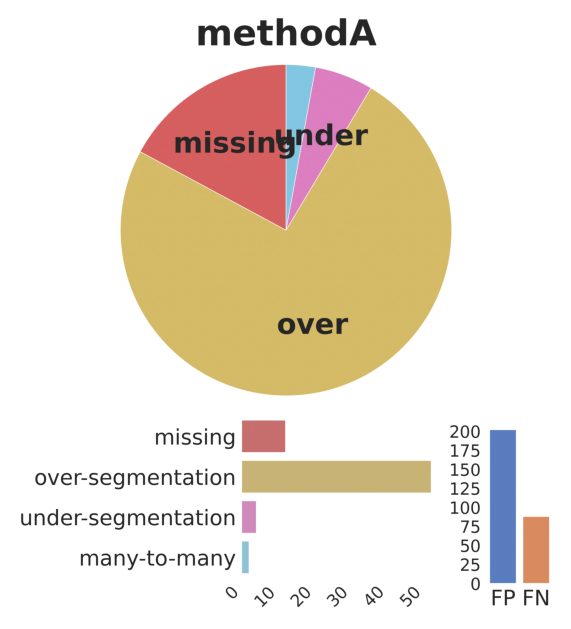

Creating combined plot for methodB . . .


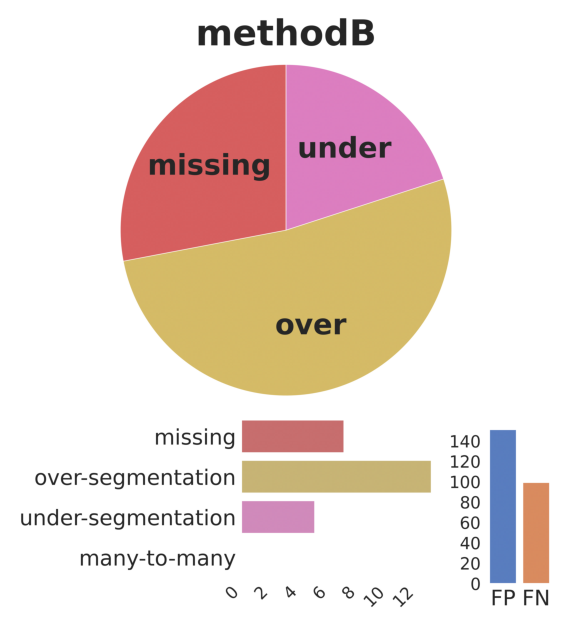

In [6]:
timise.plot()

You can also create a plot to compare the error between methods for each category with **'error_bar'**:

In [7]:
timise.plot(plot_type='error_bar', order=["methodA", "methodB"], plot_shape=[800,500])

Creating multiple prediction association plots . . .


You can also create a plot to compare each method association error separately and for each category with **'assoc_stats'**:

In [9]:
timise.plot(plot_type='assoc_stats', order=["methodA", "methodB"], plot_shape=[800,500])

Creating multiple prediction association plots . . .


You can also create a script to visualize all the instances of the prediction or just the ones that match a given category. For instance:

In [ ]:
# Create methodB visualization script for large instances
timise.create_neuroglancer_file("methodB", categories=['large'])

# Create GT visualization script for large instances
timise.create_neuroglancer_file("gt", categories=['large'])

Neuroglancer script created in /content/out_dir/neuroglancer_methodB_large.py
Neuroglancer script created in /content/out_dir/neuroglancer_gt_large.py


This will create two different neuroglancer scripts. When you run them (follow the steps described [here](https://github.com/danifranco/TIMISE/tree/main/examples/neuroglancer) to do so) the result should be this:

**Left: GT ; Right: methodB**

# 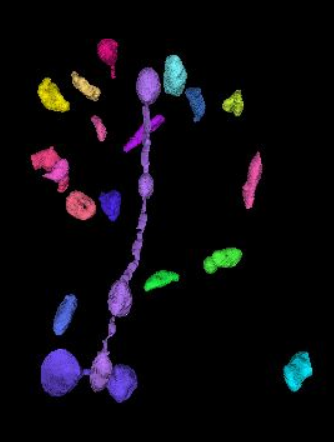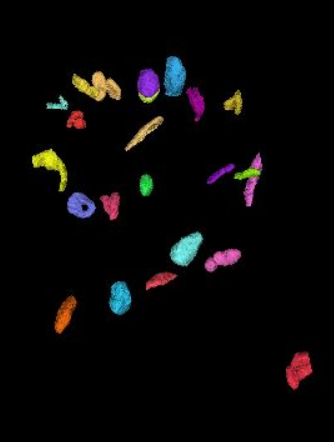